#**Probability Distribution**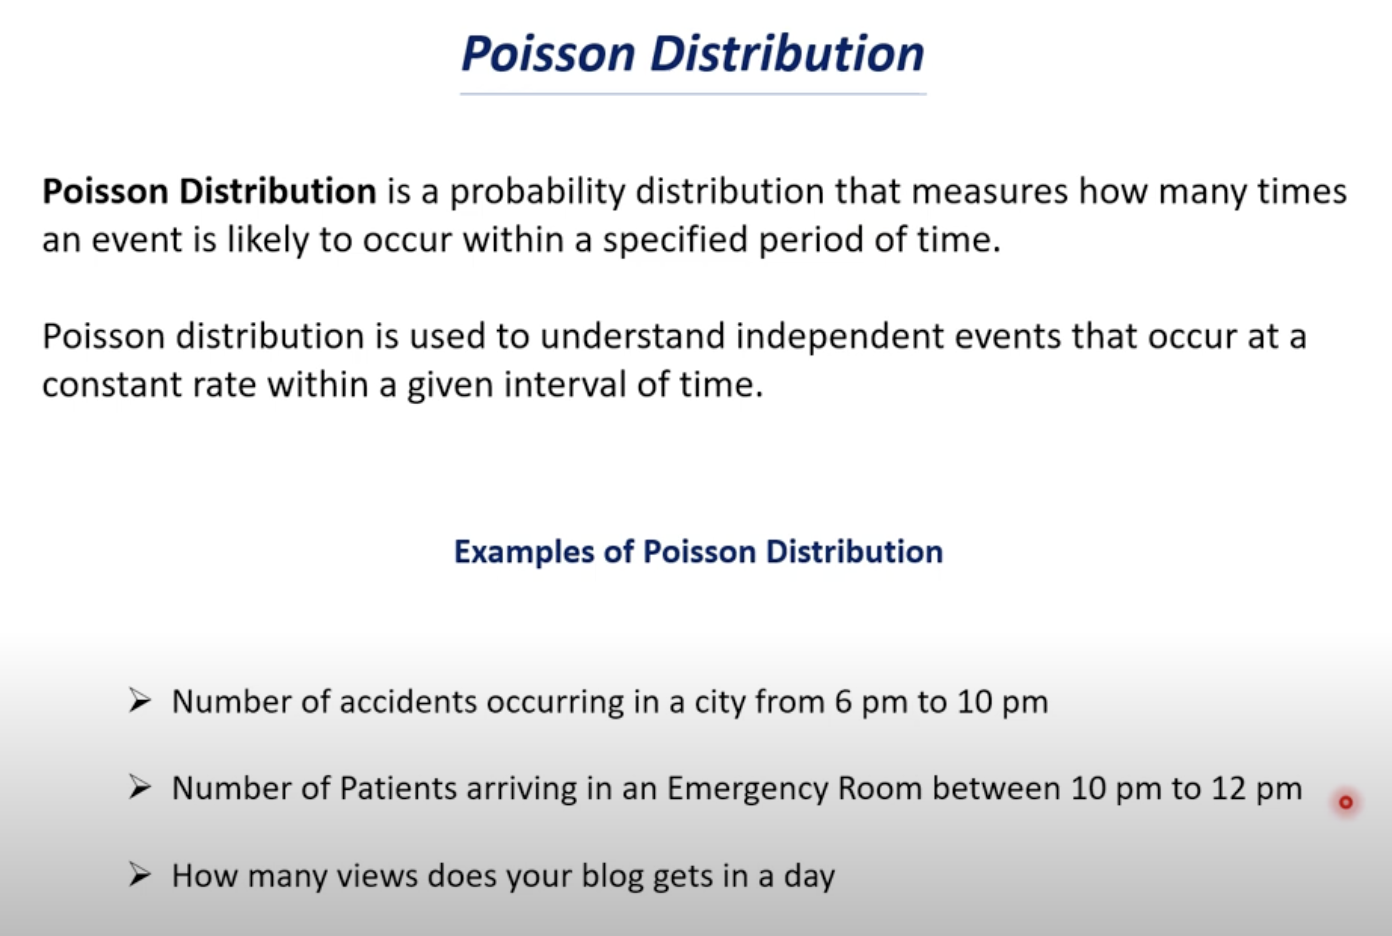

###Many statistical tools and techniques used in data analysis are based on probability. Probability measures how likely it is for an event to occur on a scale from 0 (the event never occurs) to 1 (the event always occurs). When working with data, variables in the columns of the data set can be thought of as random variables: variables that vary due to chance. A probability distribution describes how a random variable is distributed; it tells us which values a random variable is most likely to take on and which values are less likely.

###In statistics, there are a range of precisely defined probability distributions that have different shapes and can be used to model different types of random events. In this lesson we'll discuss some common probability distributions and how to work with them in Python.



##**The Uniform Distribution**

###The uniform distribution (https://en.wikipedia.org/wiki/Uniform_distribution_(continuous)) is a probability distribution where each value within a certain range is equally likely to occur and values outside of the range never occur. If we make a density plot of a uniform distribution, it appears flat because no value is any more likely (and hence has any more density) than another.


###Many useful functions for working with probability distributions in Python are contained in the scipy.stats library. Let's load in some libraries, generate some uniform data and plot a density curve:

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

/var/folders/1m/71syl3xd3910y8gqrq29f4w40000gn/T/ipykernel_1151/2950556316.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
# Generate 100000 numbers from 0 to 10
uniform_data = stats.uniform.rvs(size=100000,  loc = 0, scale=10)

In [3]:
#check the type of the data using type function
type(uniform_data)

numpy.ndarray

In [4]:
#convert the numpy array to pandas dataframe
df=pd.DataFrame(uniform_data)

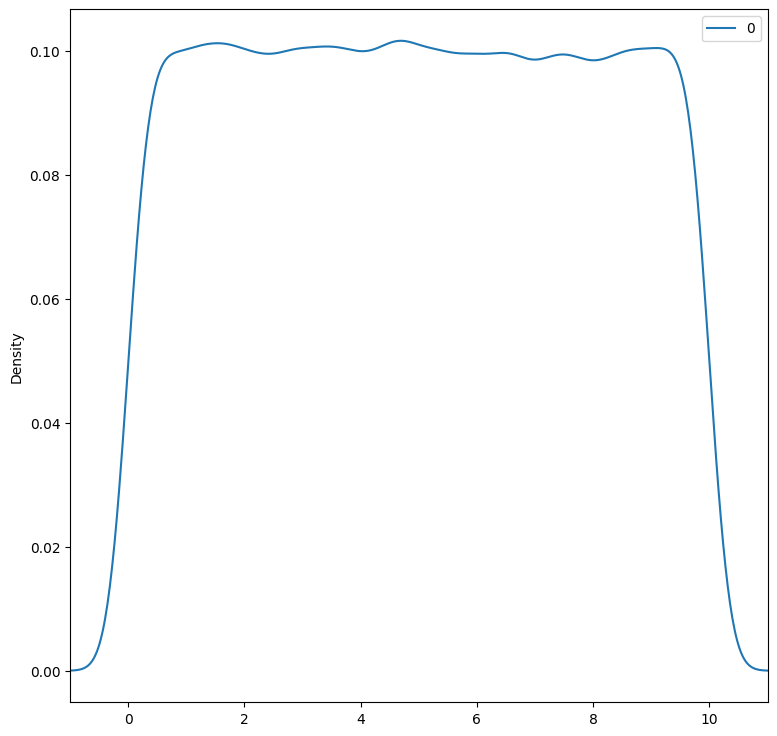

In [5]:
## Plot the distribution
df.plot(kind="density", figsize=(9,9), xlim=(-1,11));

###In the code above, we generated 100,000 data points from a uniform distribution spanning the range 0 to 10. In the density plot, we see that the density of our uniform data is essentially level meaning any given value has the same probability of occurring. The area under a probability density curve is always equal to 1.

###**-stats.distribution.rvs()** generates random numbers from the specified distribution. The arguments to rvs() will vary depending on the type of distribution you're working with; in the case of the uniform distribution, we have to specify the starting and ending points and the size (number of random points to generate.).


###**-stats.distribution.cdf()** is used to determine the probability that an observation drawn from a distribution falls below a specified value (known as the cumulative distribution function). In essence, cdf() gives you the area under the distribution's density curve to the left of a certain value on the x axis. For example, in the uniform distribution above, there is a 25% chance that an observation will be in the range 0 to 2.5 and a 75% chance it will fall in the range 2.5 to 10. We can confirm this with cdf():






In [6]:
stats.uniform.cdf(x=2.5,         # Cutoff value (quantile) to check
                  loc=0,         # Distribution start
                  scale=10)      # Distribution end


0.25

###**stats.distribution.pdf()** gives you the probability density (height of the distribution) at a given x value. Since the uniform distribution is flat, all x values within its range will have the same probability density and x values outside the range have a probability density of 0:

In [7]:
for x in range(-1,12,3):
    print("Density at x value " + str(x))
    print( stats.uniform.pdf(x, loc=0, scale=10) )

Density at x value -1
0.0
Density at x value 2
0.1
Density at x value 5
0.1
Density at x value 8
0.1
Density at x value 11
0.0


##**Generating Random Numbers and Setting The Seed**

###When you need to generate random real numbers in a range with equal probability you can draw numbers from a uniform distribution using stats.distribution.rvs(). Python also comes with a library called "random" that lets you perform various operations that involve randomization. Let's look at a few functions in the random library:

In [8]:
import random
random.randint(0,10)     # Get a random integer in the specified range

10

In [10]:
random.choice([2,4,6,9]) # Get a random element from a sequence

6

In [11]:
random.random()          # Get a real number between 0 and 1

0.10669276615944057

In [14]:
random.uniform(0,10)     # Get a real in the specified range

3.969331248777017

###Notice that the random library also lets you generate random uniform numbers. Regardless of the method you use to generate random numbers, however, the result of a random process can differ from one run to the next. Having results vary each time you run a function is often not desirable.


### For example, if you want a colleague to be able to reproduce your results exactly, you can run into problems when you use randomization. You can ensure that your results are the same each time you use a function that involves randomness by setting the random number generator's seed value to initialize it prior to running the function. Set the random seed with random.seed():

In [9]:
random.seed(12)  # Set the seed to an arbitrary value

print([random.uniform(0,10) for x in range(4)])

random.seed(12)  # Set the seed to the same value

print([random.uniform(0,10) for x in range(4)])

[4.7457067868854805, 6.574725026572553, 6.664104711248381, 1.4260035292536777]
[4.7457067868854805, 6.574725026572553, 6.664104711248381, 1.4260035292536777]


###Notice that we generated the exact same numbers with both calls to random.uniform() because we set the same seed before each call. If we had not set the seed, we would have gotten different numbers.


###**Note:** The Python standard library "random" has a separate internal seed from the numpy library. When using functions from numpy and libraries built on top of numpy (pandas, scipy, scikit-learn) use np.random.seed() to set the seed.

##**The Normal Distribution**

###The normal or Gaussian distribution is a continuous probability distribution characterized by a symmetric bell-shaped curve. A normal distribution is defined by its center (mean) and spread (standard deviation.). The bulk of the observations generated from a normal distribution lie near the mean, which lies at the exact center of the distribution: as a rule of thumb, about 68% of the data lies within 1 standard deviation of the mean, 95% lies within 2 standard deviations and 99.7% lies within 3 standard deviations.


###The normal distribution is perhaps the most important distribution in all of statistics. It turns out that many real world phenomena, like IQ test scores and human heights, roughly follow a normal distribution, so it is often used to model random variables. Many common statistical tests assume distributions are normal.

In [19]:
prob_under_minus1 = stats.norm.cdf(x= -1,
                                loc = 0,
                                scale= 1)

prob_over_1 = 1 - stats.norm.cdf(x= 1,
                                loc = 0,
                                scale= 1)

between_prob = 1-(prob_under_minus1+prob_over_1)

print(prob_under_minus1, prob_over_1, between_prob)

0.15865525393145707 0.15865525393145707 0.6826894921370859


####The output shows that roughly 16% of the data generated by a normal distribution with mean 0 and standard deviation 1 is below -1, 16% is above 1 and 68% lies between -1 and 1, which agrees with the 68, 95, 99.7 rule. Let's plot the normal distribution and inspect areas we calculated:

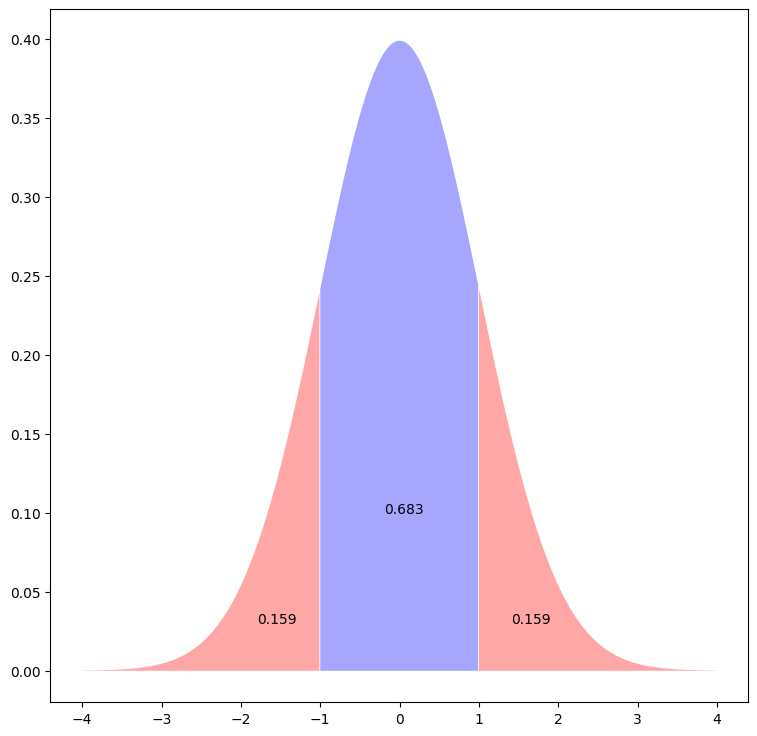

In [27]:
# Plot normal distribution areas*

plt.rcParams["figure.figsize"] = (9,9)

plt.fill_between(x=np.arange(-4,-1,0.01),
                 y1= stats.norm.pdf(np.arange(-4,-1,0.01)) ,
                 facecolor='red',
                 alpha=0.35)

plt.fill_between(x=np.arange(1,4,0.01),
                 y1= stats.norm.pdf(np.arange(1,4,0.01)) ,
                 facecolor='red',
                 alpha=0.35)

plt.fill_between(x=np.arange(-1,1,0.01),
                 y1= stats.norm.pdf(np.arange(-1,1,0.01)) ,
                 facecolor='blue',
                 alpha=0.35)

plt.text(x=-1.8, y=0.03, s= round(prob_under_minus1,3))
plt.text(x=-0.2, y=0.1, s= round(between_prob,3))
plt.text(x=1.4, y=0.03, s= round(prob_over_1,3));

###The plot above shows the bell shape of the normal distribution, the area below and above one standard deviation and the area within 1 standard deviation of the mean. Finding quantiles of the normal distribution is a common task when performing statistical tests. You can check normal distribution quantiles with stats.norm.ppf():

In [28]:
print( stats.norm.ppf(q=0.025) ) # Find the quantile for the 2.5% cutoff

print( stats.norm.ppf(q=0.975) ) # Find the quantile for the 97.5% cutoff

-1.9599639845400545
1.959963984540054


###**Example:**Let's say you have a group of students and you've collected data on their heights. You find that the heights follow a normal distribution with a mean (average) of 160 cm and a standard deviation of 10 cm.

Now, let's find some specific quantiles:

**50th Percentile (Median):** This is the height below which 50% of the students fall. Since the distribution is symmetric, the median is equal to the mean:

Median = Mean = 160 cm

So, the median height is 160 cm.

**25th Percentile:** This is the height below which 25% of the students fall. To find this, we can use the standard normal distribution table or calculator to get the z-score corresponding to the 25th percentile, which is approximately -0.675.

###The normal distribution, also known as the Gaussian distribution or bell curve, is widely used in various real-world applications due to its properties and ubiquity in natural phenomena. Here are some examples of its applications:

**Biometrics:** Many physical and biological measurements, such as height, weight, blood pressure, and IQ scores, tend to follow a normal distribution within a population. Understanding the properties of the normal distribution helps in analyzing and interpreting these measurements in fields like anthropology, medicine, and psychology.

**Quality Control:** In manufacturing processes, certain characteristics of products, such as length, width, or weight, often follow a normal distribution. Quality control engineers use statistical methods based on the normal distribution to monitor and maintain product quality, detect defects, and set specifications.

**Financial Markets:** Stock prices and returns in financial markets often exhibit a roughly normal distribution. Understanding the properties of the normal distribution is essential for various financial modeling and risk management techniques, such as portfolio optimization, value-at-risk (VaR) analysis, and option pricing models.

##**The Binomial Distribution**

###The binomial distribution is a discrete probability distribution that models the outcomes of a given number of random trails of some experiment or event. The binomial is defined by two parameters: the probability of success in any given trial and the number of trials. The binomial distribution tells you how likely it is to achieve a given number of successes in n trials of the experiment. For example, we could model flipping a fair coin 10 times with a binomial distribution where the number of trials is set to 10 and the probability of success is set to 0.5. In this case the distribution would tell us how likely it is to get zero heads, 1 head, 2 heads and so on.

###The scipy name for the binomial is binom. Let's generate and investigate some binomial data:

col_0    0     1      2       3       4       5       6       7      8     9   \
row_0                                                                           
counts  963  9617  43979  117523  205111  245789  205405  116572  44339  9762   

col_0    10  
row_0        
counts  940  


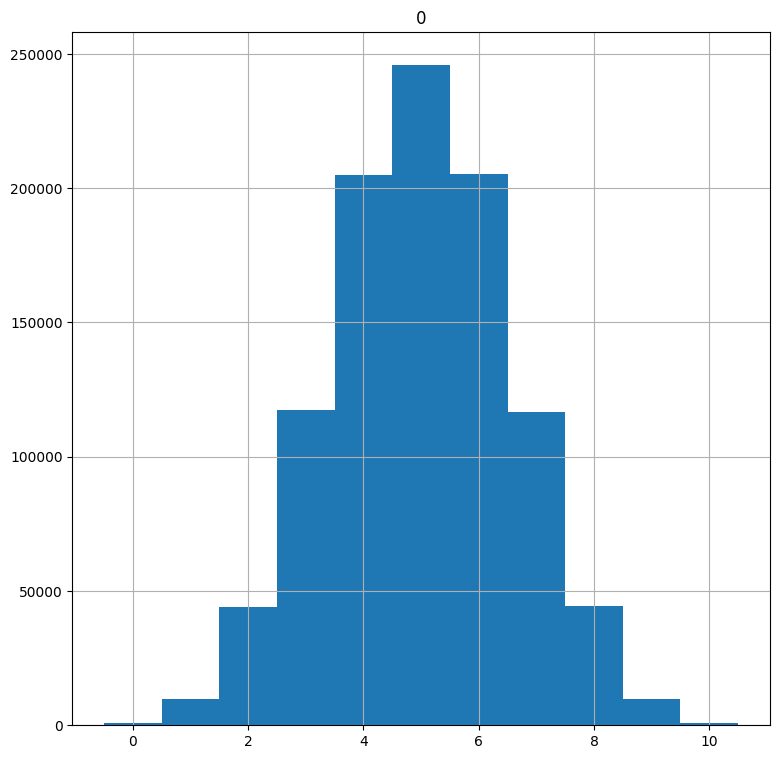

In [32]:
fair_coin_flips = stats.binom.rvs(n=10,        # Number of flips per trial
                                  p=0.5,       # Success probability
                                  size=1000000)  # Number of trials

print( pd.crosstab(index="counts", columns= fair_coin_flips))

pd.DataFrame(fair_coin_flips).hist(range=(-0.5,10.5), bins=11);

###**Note** that since the binomial distribution is discrete, it only takes on integer values so we can summarize binomial data with a frequency table and its distribution with a histogram. The histogram shows us that a binomial distribution with a 50% probability of success is roughly symmetric, with the most likely outcomes lying at the center. This is reminiscent of the normal distribution, but if we alter the success probability, the distribution won't be symmetric:

col_0   3   4    5    6     7     8     9     10
row_0                                           
counts   7  61  279  908  1977  3011  2661  1096


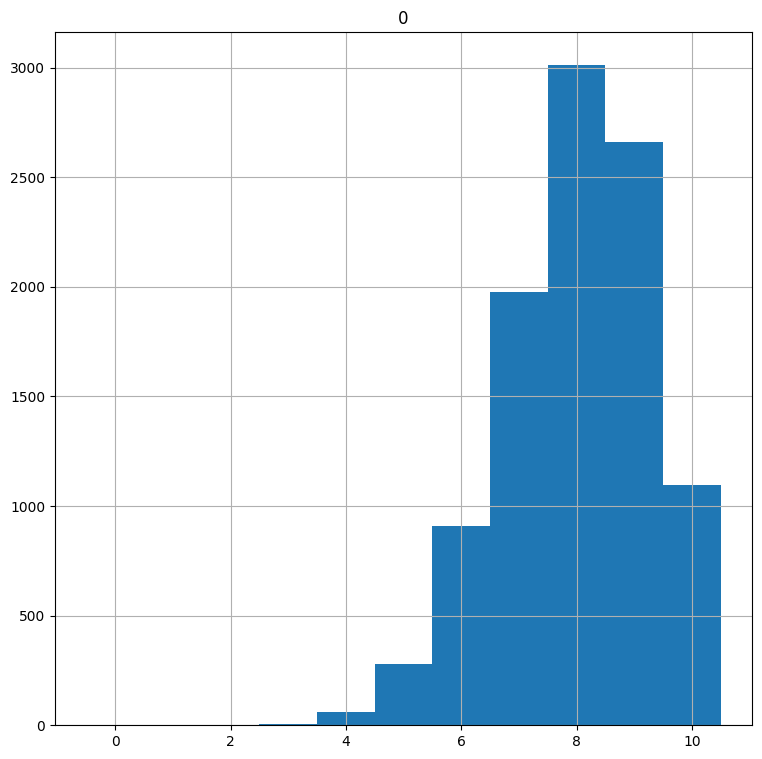

In [33]:
biased_coin_flips = stats.binom.rvs(n=10,      # Number of flips per trial
                                  p=0.8,       # Success probability
                                  size=10000)  # Number of trials

# Print table of counts
print( pd.crosstab(index="counts", columns= biased_coin_flips))

# Plot histogram
pd.DataFrame(biased_coin_flips).hist(range=(-0.5,10.5), bins=11);

###The cdf() function lets us check the probability of achieving a number of successes within a certain range:

In [34]:
stats.binom.cdf(k=5,        # Probability of k = 5 successes or less
                n=10,       # With 10 flips
                p=0.8)      # And success probability 0.8

0.03279349759999997

In [37]:
1-stats.binom.cdf(k=8,        # Probability of k = 9 successes or more
                    n=10,       # With 10 flips
                    p=0.8)      # And success probability 0.8

0.37580963840000015

###For continuous probability density functions, you use pdf() to check the probability density at a given x value. For discrete distributions like the binomial, use stats.distribution.pmf() (probability mass function) to check the mass (proportion of observations) at given number of successes k:


In [41]:
 #probability of a specific number of successes (or failures) in a fixed number of independent trials, each with the same probability of success.
stats.binom.pmf(k=5,        # Probability of k = 5 successes
                n=10,       # With 10 flips
                p=0.5)      # And success probability 0.5


0.24609375000000003

In [39]:
stats.binom.pmf(k=8,        # Probability of k = 8 successes
                n=10,       # With 10 flips
                p=0.8)      # And success probability 0.8

0.30198988799999993


###**Application** The binomial distribution finds applications in various real-world scenarios where we have a fixed number of independent trials, each with a binary outcome (success or failure), and the probability of success remains constant across all trials. Here are some examples of real-life applications:

**Quality Control:** In manufacturing, a product may be either defective or non-defective. Quality control inspectors often take a sample of products and check them for defects. The binomial distribution can be used to calculate the probability of finding a certain number of defective items in the sample.

**Biomedical Studies:** In clinical trials, researchers often conduct experiments to test the effectiveness of a new drug or treatment. Patients are randomly assigned to receive either the treatment or a placebo, and the success of the treatment (e.g., cure rate) is observed. The binomial distribution can be used to analyze the outcomes of such trials.

**Survey Analysis:** In opinion polls or surveys, respondents are typically asked a yes-or-no question. For example, "Do you approve of the current government?" or "Have you purchased a product in the last month?" The binomial distribution can be used to model the probability of obtaining a certain number of positive responses in the survey.

##**The Geometric and Exponential Distributions¶**


###The geometric distribution is discrete and models the number of trials it takes to achieve a success in repeated experiments with a given probability of success. The exponential distribution is a continuous analog of the geometric distribution and models the amount of time you have to wait before an event occurs given a certain occurrence rate.

The scipy nickname for the geometric distribution is "geom". Let's use the geom functions to model the number of trials it takes to get a success (heads) when flipping a fair coin:

col_0     1     2     3    4    5    6   7   8   9   10  11  12  13  14  16
row_0                                                                      
counts  4898  2509  1219  676  327  181  90  40  30  14   6   4   2   2   2


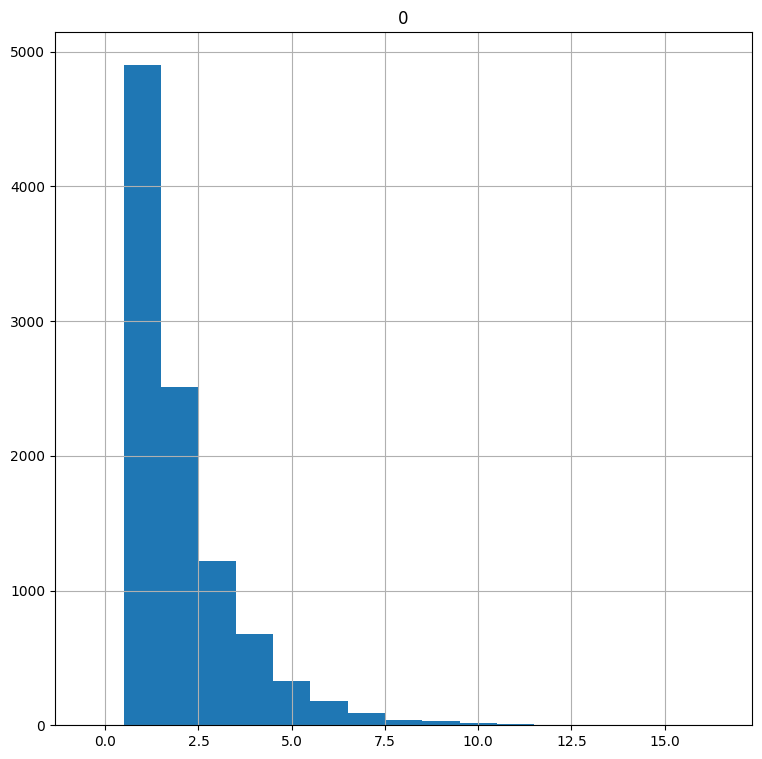

In [43]:
random.seed(12)
"""
This generates random numbers following a geometric distribution. Each number represents
the number of flips needed to get the first "heads" (success) in a series of independent Bernoulli
trials, where each trial has a probability of success (getting heads) equal to p=0.5.
"""
flips_till_heads = stats.geom.rvs(size=10000,  # Generate geometric data
                                  p=0.5)       # With success prob 0.5

# Print table of counts
#it's computing the frequency of each unique value in flips_till_heads.
print( pd.crosstab(index="counts", columns= flips_till_heads))

# Plot histogram
pd.DataFrame(flips_till_heads).hist(range=(-0.5,max(flips_till_heads)+0.5)
                                    , bins=max(flips_till_heads)+1);

###The distribution looks similar to what we'd expect: it is very likely to get a heads in 1 or 2 flips, while it is very unlikely for it to take more than 5 flips to get a heads. In the 10,000 trails we generated, the longest it took to get a heads was 13 flips.



###In general, this will plot a histogram showing the distribution of the number of flips needed to get the first "heads". The x-axis represents the number of flips, and the y-axis represents the frequency of occurrences for each number of flips.

In [56]:
#Let's use cdf() to check the probability of needing 6 flips or more to get a success:
"""
ndicating that we want to find the probability of needing 6 flips or fewer to
get a success (i.e., getting the first "heads" within the first 6 flips).
"""
first_five = stats.geom.cdf(k=5,   # Prob of success in first 5 flips
                           p=0.5)

print(first_five)


0.96875


In [61]:
#Use pmf() to check the probability of seeing a specific number of flips before a successes:
stats.geom.pmf(k=5,   # Prob of needing exactly 2 flips to get first success
              p=0.5)

0.03125

###The scipy name for the exponential distribution is "expon". Let's investigate the exponential distribution:



In [66]:
# Get the probability of waiting less than 1 time unit before a success
prob_1 = stats.expon.cdf(x=1,
                         scale=2)  # Arrival rate
print(prob_1)
# Get the probability of waiting more than 1 time unit before a success
1 - prob_1

0.3934693402873666


0.6065306597126334

**Note:** The average arrival time for the exponential distribution is equal to 1/arrival_rate.

Let's plot this exponential distribution to get an idea of its shape:

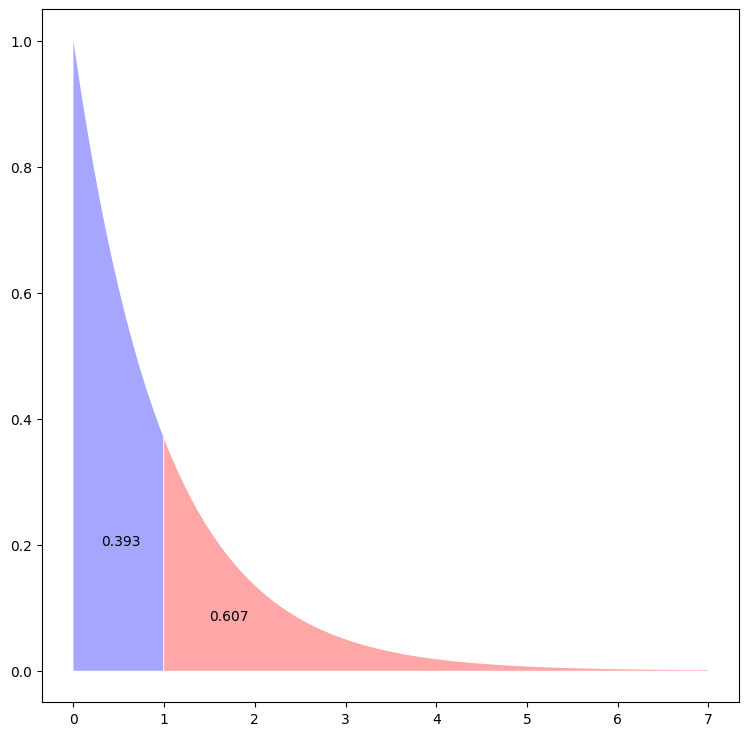

In [67]:
plt.fill_between(x=np.arange(0,1,0.01),
                 y1= stats.expon.pdf(np.arange(0,1,0.01)) ,
                 facecolor='blue',
                 alpha=0.35)

plt.fill_between(x=np.arange(1,7,0.01),
                 y1= stats.expon.pdf(np.arange(1,7,0.01)) ,
                 facecolor='red',
                 alpha=0.35)


plt.text(x=0.3, y=0.2, s= round(prob_1,3))
plt.text(x=1.5, y=0.08, s= round(1 - prob_1,3));

###Similar to the geometric distribution, the exponential starts high and has a long tail that trails off to the right that contains rare cases where you have to wait much longer than average for an arrival.

###**Geometric distribution application**

###In industry, the geometric distribution can find applications in various processes and scenarios. Here are some examples:

1. **Manufacturing Defects**: In quality control processes, the geometric distribution can be used to model the number of production runs or units produced before the first defective item is encountered. Each production run or unit inspection represents a trial, and the probability of encountering a defective item represents the probability of success in the geometric distribution.

2. **Equipment Downtime**: In maintenance scheduling and reliability engineering, the geometric distribution can be used to model the number of operating cycles or time periods before a piece of equipment experiences its first failure or requires maintenance. Each operating cycle or time period represents a trial, and the probability of failure or maintenance requirement represents the probability of success in the geometric distribution.

3. **Supply Chain Management**: In inventory management and supply chain optimization, the geometric distribution can be used to model the number of replenishment cycles or orders before the first stockout occurs. Each replenishment cycle or order represents a trial, and the probability of a stockout represents the probability of success in the geometric distribution.

4. **Equipment Lifespan**: In asset management and planning, the geometric distribution can be used to model the number of operating hours or usage cycles before a piece of equipment reaches the end of its useful life or requires replacement. Each operating hour or usage cycle represents a trial, and the probability of reaching the end of useful life represents the probability of success in the geometric distribution.

5. **Production Process Optimization**: In production planning and process optimization, the geometric distribution can be used to model the number of iterations or attempts needed to achieve a desired outcome, such as meeting production targets or quality standards. Each iteration or attempt represents a trial, and the probability of success represents the probability of success in the geometric distribution.

Overall, the geometric distribution can be a valuable tool in industry for modeling and analyzing various processes, including quality control, maintenance scheduling, inventory management, asset management, and production planning. It provides insights into the expected number of trials or cycles needed to achieve certain outcomes, helping businesses make informed decisions and improve efficiency.

##**The Poisson Distribution**


###The Poisson distribution models the probability of seeing a certain number of successes within a time interval, where the time it takes for the next success is modeled by an exponential distribution. The Poisson distribution can be used to model traffic, such as the number of arrivals a hospital can expect in a hour's time or the number of emails you'd expect to receive in a week.

The scipy name for the Poisson distribution is "poisson". Let's generate and plot some data from a Poisson distribution with an arrival rate of 1 per time unit:

###**Example**
    1.Number accidents occure in a city between 6pm to 10pm

    2. Number of patients arriving in an emergency room between 10pm to 12 pm

    3. How many view does your blogs gets ina day

col_0      0     1     2    3    4   5  6  7
row_0                                       
counts  3650  3643  1892  605  160  41  7  2


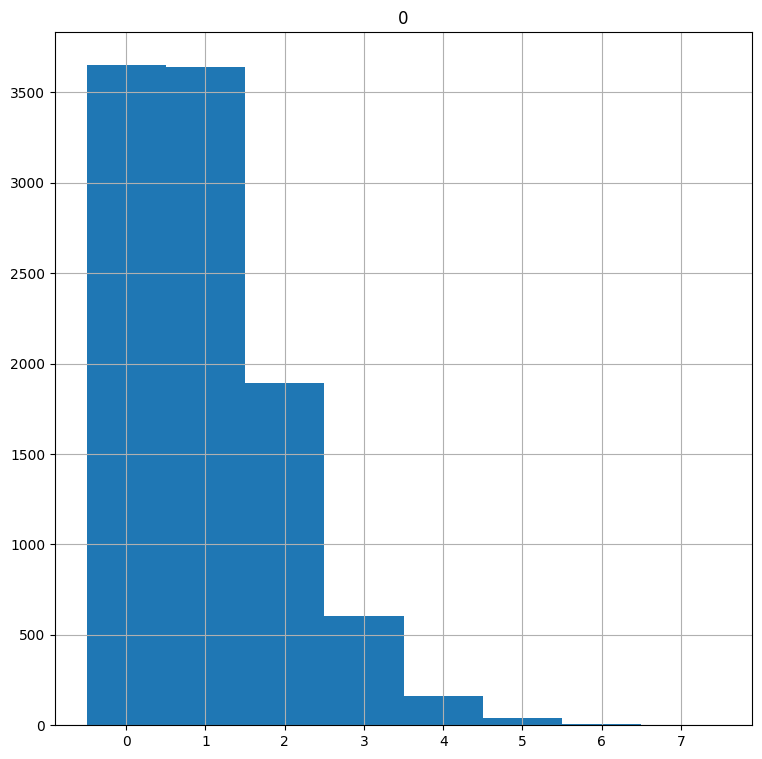

In [68]:
random.seed(12)

arrival_rate_1 = stats.poisson.rvs(size=10000,  # Generate Poisson data
                                   mu=1 )       # Average arrival time 1

# Print table of counts
print( pd.crosstab(index="counts", columns= arrival_rate_1))

# Plot histogram
pd.DataFrame(arrival_rate_1).hist(range=(-0.5,max(arrival_rate_1)+0.5)
                                    , bins=max(arrival_rate_1)+1);

###The histogram shows that when arrivals are relatively infrequent, it is rare to see more than a couple of arrivals in each time period. When the arrival rate is high, it becomes increasingly rare to see a low number of arrivals and the distribution starts to look more symmetric:



col_0   1   2   3    4    5    6    7     8     9     10  ...   14   15   16  \
row_0                                                     ...                  
counts   4  18  71  171  387  679  949  1131  1285  1209  ...  483  313  196   

col_0    17  18  19  20  21  22  24  
row_0                                
counts  123  64  28  12   8   6   1  

[1 rows x 23 columns]


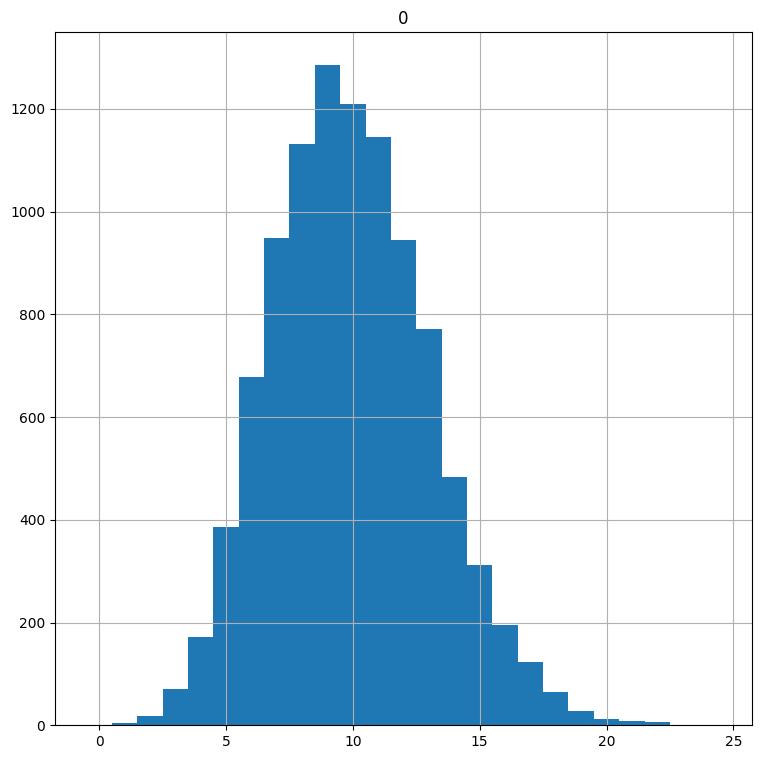

In [69]:
random.seed(12)

arrival_rate_10 = stats.poisson.rvs(size=10000,  # Generate Poisson data
                                   mu=10 )       # Average arrival time 10

# Print table of counts
print( pd.crosstab(index="counts", columns= arrival_rate_10))

# Plot histogram
pd.DataFrame(arrival_rate_10).hist(range=(-0.5,max(arrival_rate_10)+0.5)
                                    , bins=max(arrival_rate_10)+1);

###As with other discrete probability distributions, we can use cdf() to check the probability of achieving more or less than a certain number of successes and pmf() to check the probability of obtaining a specific number of successes:

In [70]:
stats.poisson.cdf(k=5,     # Check the probability of 5 arrivals or less
                  mu=10)   # With arrival rate 10

0.06708596287903189

In [71]:
stats.poisson.pmf(k=10,     # Check the prob f exactly 10 arrivals
                  mu=10)    # With arrival rate 10

0.12511003572113372

| Distribution     | Probability Function         | Example of Real-World Application                     |
|------------------|------------------------------|-------------------------------------------------------|
| <font size="4">Normal</font>           | <font size="4">\(f(x) = \frac{1}{\sqrt{2\pi\sigma^2}}e^{-\frac{(x-\mu)^2}{2\sigma^2}}\)</font> | <font size="4">1. Heights of individuals in a population</font>             |
|                  |                              | <font size="4">2. IQ scores</font>                                            |
|                  |                              | <font size="4">3. Measurement errors</font>                                   |
| <font size="4">Binomial</font>         | <font size="4">\(f(k;n,p) = \binom{n}{k} p^k(1-p)^{n-k}\)</font>                      | <font size="4">1. Number of successes in a fixed number of independent trials with a constant probability of success</font> |
|                  |                              | <font size="4">2. Coin tosses (success = heads, failure = tails)</font>     |
|                  |                              | <font size="4">3. Pass/fail outcomes</font>                                   |
| <font size="4">Geometric</font>        | <font size="4">\(f(k;p) = (1-p)^{k-1}p\)</font>                              | <font size="4">1. Number of trials needed to achieve the first success in a series of independent Bernoulli trials</font> |
|                  |                              | <font size="4">2. Number of attempts to achieve the first sale</font>        |
|                  |                              | <font size="4">3. Number of tries to get the first "heads" in coin flips</font> |
| <font size="4">Poisson</font>          | <font size="4">\(f(k;\lambda) = \frac{e^{-\lambda}\lambda^k}{k!}\)</font>           | <font size="4">1. Number of arrivals in a fixed interval of time</font>     |
|                  |                              | <font size="4">2. Number of defects in a fixed area or volume</font>        |
|                  |                              | <font size="4">3. Number of calls to a call center in a given time period</font> |
